In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('../US_Accidents/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
len(df)

3513617

In [4]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [5]:
columns = df.columns
print(columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [7]:
#Check the number of missing values in each column
for column in columns:
    print(column)
    print(df[column].isna().mean())

ID
0.0
Source
0.0
TMC
0.29451104090172603
Severity
0.0
Start_Time
0.0
End_Time
0.0
Start_Lat
0.0
Start_Lng
0.0
End_Lat
0.7054889590982739
End_Lng
0.7054889590982739
Distance(mi)
0.0
Description
2.84607001844538e-07
Number
0.6440269386219386
Street
0.0
Side
0.0
City
3.187598420658825e-05
County
0.0
State
0.0
Zipcode
0.0003042448849718111
Country
0.0
Timezone
0.0011042751671568073
Airport_Code
0.0019233741184653877
Weather_Timestamp
0.01233002914091092
Temperature(F)
0.01870778744524517
Wind_Chill(F)
0.5317167465890562
Humidity(%)
0.01983340813754032
Pressure(in)
0.01590440847707647
Visibility(mi)
0.021589148731919274
Wind_Direction
0.01675595262659533
Wind_Speed(mph)
0.12938490450154358
Precipitation(in)
0.5765779252548016
Weather_Condition
0.021669407906439432
Amenity
0.0
Bump
0.0
Crossing
0.0
Give_Way
0.0
Junction
0.0
No_Exit
0.0
Railway
0.0
Roundabout
0.0
Station
0.0
Stop
0.0
Traffic_Calming
0.0
Traffic_Signal
0.0
Turning_Loop
0.0
Sunrise_Sunset
3.2729805212121865e-05
Civil_Twilight


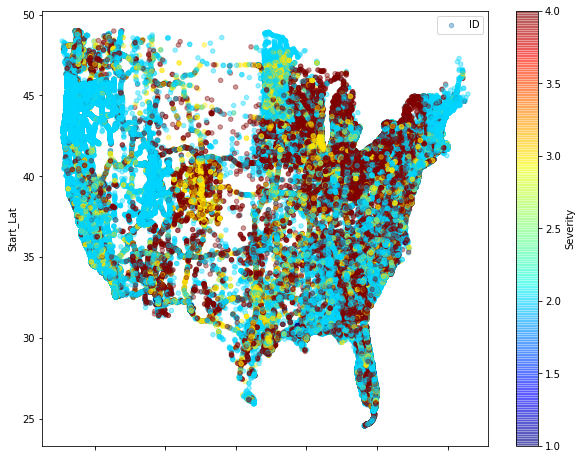

In [8]:
viz_4=df.plot(kind='scatter', x='Start_Lng', y='Start_Lat',label = 'ID',c='Severity',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [25]:
#State with the most accidents
acc_state = df.groupby(['State']).ID.count()

In [26]:
print(acc_state)

State
AL     44625
AR      2012
AZ     78584
CA    816825
CO     49731
CT     25901
DC      4820
DE      5739
FL    258002
GA     93614
IA     11475
ID      2044
IL     99692
IN     33746
KS      7939
KY     22553
LA     61515
MA     39044
MD     53593
ME      2243
MI     95983
MN     81863
MO     33643
MS      6585
MT       512
NC    165958
ND        44
NE     23970
NH      7984
NJ     59059
NM      5523
NV     10643
NY    160817
OH     66139
OK     60003
OR     90122
PA    106787
RI     11753
SC    173277
SD        61
TN     69895
TX    329284
UT     51685
VA     96075
VT       702
WA     68544
WI     20120
WV      2381
WY       508
Name: ID, dtype: int64
